<a href="https://www.kaggle.com/syedsaadhussain/eda-zomato?scriptVersionId=89575692" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Topics

**finding restaurants with most branches in Chennai**


**finding best restaurants with it's details**


**finding cheap and best restaurants**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../input/chennai-zomato-restaurants-data/Zomato Chennai Listing 2020.csv')

In [3]:
#WE WILL COUNT THE NUMBER OF TIMES A RESTAURANT'S NAME HAS BEEN REPEATED

df['count']=1
a=df.groupby(['Name of Restaurant']).count()['count']



#THEN WE WILL SORT IN DESCENDING ORDER AND SLICE THE TOP 5
b=a.sort_values(ascending=False)
most_branches=b[0:6]

most_branches


Name of Restaurant
Amma Unavagam      78
CK's Bakery        71
Domino's Pizza     66
Lassi Shop         58
OYALO              51
Cafe Coffee Day    51
Name: count, dtype: int64

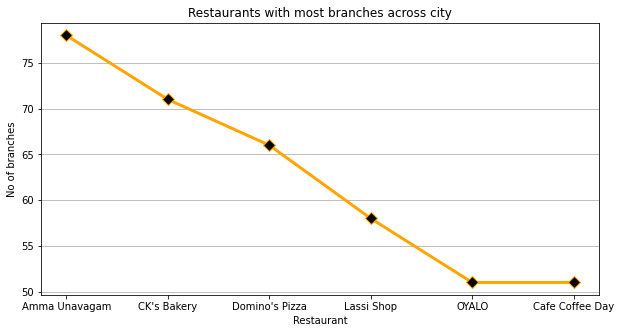

In [4]:
#THIS IS A GRAPHICAL REPRESENTATION  
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(most_branches,color='orange',linewidth=3,marker="D",markerfacecolor='black',markersize=8)
plt.xlabel('Restaurant')
plt.ylabel('No of branches')
plt.title('Restaurants with most branches across city')
plt.grid(axis='y')


IN ORDER TO FIND BEST RESTAURANT I ADDED BOTH DINING AND 
DELIVERY RATING AND RATED IT OUT OF 10

In [5]:
# FIRST I REPLACED 'NONE' WITH 0 IN THE DF AND THEN CREATED A NEW COLUMN CALLED "total_rating"

df.loc[df['Dining Rating']=='None','Dining Rating']=0
df.loc[df['Delivery Rating']=='None','Delivery Rating']=0


df['total_rating']=df['Dining Rating'].astype(float)+df['Delivery Rating'].astype(float)


#SORTING IN DESCENDING ORDER AND PICKING UP THE TOP 5
s=df['total_rating'].sort_values(ascending=False )
e=s[0:6]

In [6]:
best_restaurants=df.iloc[e.index]['Name of Restaurant']

In [7]:
#BEST RESTAURANTS(RATING WISE)

best_restaurants.reset_index()

,index,Name of Restaurant
0,155,The Sandwich Shop
1,62,Amadora Gourmet Ice Cream & Sorbet
2,163,Momo Sa-Khang by Kailash Kitchen
3,192,Kabab Corner
4,184,Gossip Fusion Bistro
5,57,Brownie Heaven


## DETAILS OF TOP RATED RESTAURANTS

In [8]:
#GETTING THE DETAILS OF TOP RATED RESTAURANTS WITH FOR LOOP

a=1
for i in e.index:
    print("")
    print("")
    print(a,')',df.iloc[i])
    a+=1



1 ) Zomato URL               https://www.zomato.com/chennai/the-sandwich-sh...
Name of Restaurant                                       The Sandwich Shop
Address                            1, Subba Street, West Mambalam, Chennai
Location                                                     West Mambalam
Cuisine                           ['Sandwich', ' Fast Food', ' Beverages']
Top Dishes               ['Mocktails', ' Fries', ' Pizza Sandwich', ' T...
Price for 2                                                          300.0
Dining Rating                                                          4.9
Dining Rating Count                                                    584
Delivery Rating                                                        4.4
Delivery Rating Count                                                  895
Features                 ['Home Delivery', 'Vegetarian Only', 'Bulk Ord...
count                                                                    1
total_rating       

# CHEAP AND BEST RESTAURANTS


In [9]:
#HERE I FILTERED THE RESTAURANTS BY TOP RATING AND CHEAP PRICE


k=df.groupby(['Name of Restaurant']).mean().sort_values('total_rating',ascending=False)
k

,Price for 2,count,total_rating
Name of Restaurant,,,
Momo Sa-Khang by Kailash Kitchen,350.0,1.0,9.3
Amadora Gourmet Ice Cream & Sorbet,500.0,1.0,9.3
Gossip Fusion Bistro,1500.0,1.0,9.2
Kabab Corner,450.0,1.0,9.2
Fusilli Reasons,400.0,1.0,9.1
...,...,...,...
Moras - Food Point,250.0,1.0,0.0
More Than Momos,225.0,1.0,0.0
Moshi Minutes,200.0,1.0,0.0


In [10]:
#slicing timeee
price=k['Price for 2'][0:6]
rating=k['total_rating'][0:6]

#TOOK THE NAME
res_name=['Momo Sa-Khang by Kailash Kitchen','Fusilli Reasons','Kabab Corner','Amadora Gourmet Ice Cream & Sorbet','Soy Soi','Gossip Fusion Bistro']

price=price.sort_values()


# BAR CHART

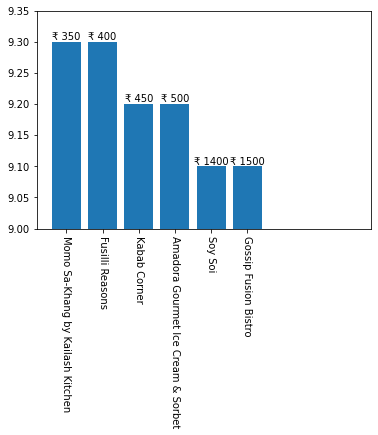

In [11]:
plt.bar(res_name,rating)
plt.plot(range(9))
plt.ylim(9,9.35)
plt.text(0,rating[0],'₹ 350',ha='center',va='bottom')
plt.text(1,rating[1],'₹ 400',ha='center',va='bottom')
plt.text(2,rating[2],'₹ 450',ha='center',va='bottom')
plt.text(3,rating[3],'₹ 500',ha='center',va='bottom')
plt.text(4,rating[4],'₹ 1400',ha='center',va='bottom')
plt.text(5,rating[5],'₹ 1500',ha='center',va='bottom')


plt.xticks(rotation=270)
plt.show()